# ELVTR Data Science Main Project

## Deliverables

### 01 Git Repository

Include all project code with a README file containing a high-level project description.

Example README guide: [Make a README](link-to-readme-guide)

### 02 Report

* Methodology, approach, and model selection rationale.
* Advantages and limitations of the chosen model.
* Architecture of the final solution.
* Considerations on deployment and scalability of the solution - i.e., how will the model be used in BAU by the business?
* Estimated impact/ROI of the project.

# Data Science in Finance: Lending Club Loan Analysis

## Project Overview

Lending Club has tasked us with preparing a loan application dataset for analysis and predictive modeling. 

The key tasks include data cleaning, exploratory data analysis, and building a predictive model for loan classification. An optional component involves building a real-time scoring application.

**Project Objectives**:
- Clean and preprocess the data.
- Perform exploratory data analysis (EDA) to gain insights.
- Develop a predictive model for loan application approval.
- (Optional) Build a real-time scoring application.

**Dataset Description**:
The dataset consists of loan application records, including various financial metrics and the application status. The data dictionary is provided for understanding the attributes.

**Dataset Path**:
- CSV: `data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv`
- Data Dictionary: `data/1-raw/lending-club-2007-2020Q3/LCDataDictionary.xlsx`

In [1]:
pwd

'c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\notebooks'

## Importing Required Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, normaltest, shapiro, anderson

# Pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Plot settings for consistent figure size (A4 landscape top half)
FIG_WIDTH = 11.69  # Width
FIG_HEIGHT = 4.14  # Height

# Set the theme for Seaborn plots
sns.set_theme(style='whitegrid')

## Load Data Set

In [3]:
# Load the data xlsx file as a dataframe
df = pd.read_csv("c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\data\\raw\\Loan_status_2007-2020Q3\\Loan_status_2007-2020Q3-100k-Full-Data.csv")

# Clean headers in the existing DataFrame 'df'
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Display cleaned headers
print("Cleaned headers:", df.columns.tolist())

df.shape

Cleaned headers: ['unnamed:_0.1', 'unnamed:_0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status

(100000, 143)

In [4]:
df.head()

,unnamed:_0.1,unnamed:_0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000,4000,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-20,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1,Dec-04,665,669,0,19.0,110.0,4,1,1988,82.80%,12,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-20,134.93,Jun-20,May-20,669,665,1.0,NaN,1,Individual,NaN,NaN,NaN,0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000,24000,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-16,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0,Jan-04,680,684,0,NaN,NaN,10,0,22697,64.50%,24,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-20,500.07,Jun-20,May-20,704,700,0.0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000,5000,5000.0,36 months,10.49%,162.49,B,B3,driver,10+ years,MORTGAGE,55000.0,Not Verified,Jan-15,Fully Paid,n,https://lendingclub.com/

In [5]:
# Load the data dictionary CSV file as a dataframe
df_data_dict = pd.read_excel("c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\data\\raw\\Loan_status_2007-2020Q3\\LCDataDictionary.xlsx")

# Clean headers in the existing DataFrame 'df'
df_data_dict.columns = df_data_dict.columns.str.strip().str.lower().str.replace(" ", "_")

# Remove trailing whitespaces in all string columns of df_data_dict
df_data_dict = df_data_dict.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Display cleaned headers
print("Cleaned headers:", df_data_dict.columns.tolist())

df_data_dict.shape

Cleaned headers: ['loanstatnew', 'description']


(153, 2)

In [6]:
# Copies the columns and descriptions from the data dictionary into a data frame for future recall.
# Initialize empty lists for LoanStatNew and Description
loanstatnew = []
description = []

# Iterate through each row in the DataFrame and populate lists
for _, row in df_data_dict.iterrows():
    loanstatnew.append(row['loanstatnew'])
    description.append(row['description'])

# Apply left-aligned styling to both headers and data cells
styled_df_data_dict = df_data_dict.style.set_properties(
    **{'text-align': 'left', 'white-space': 'nowrap'}
).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

# Display styled DataFrame
styled_df_data_dict

,loanstatnew,description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


After analysing our data dictionary it is possible to class our columns into figurative categories to better organise our analysis. 

These categories are, for now:

- Credit history, 
- Current Debt and Payment behaviours, 
- Employement, 
- Credit inquiries
- Loan Application information
- Hardship and Settlement Information
- Co-Borrower Information
- Loan Performance

Let's create a table for reference. We'll add these manually so that we can tweak the data within each group as we discover more about our data.

In [7]:
import pandas as pd

# Define the groups and fields as specified
groups = {
    "Credit History": [
        'earliest_cr_line', 'fico_range_high', 'fico_range_low', 'last_fico_range_high',
        'last_fico_range_low', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'num_accts_ever_120_pd',
        'num_tl_120dpd_2m', 'pub_rec', 'pub_rec_bankruptcies'
    ],
    "Current Debt and Payment Behaviors": [
        'acc_now_delinq', 'all_util', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
        'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'max_bal_bc', 'mths_since_last_delinq',
        'num_rev_accts', 'num_rev_tl_bal_gt_0', 'percent_bc_gt_75', 'revol_bal', 'revol_util',
        'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit'
    ],
    "Employment": [
        'emp_length', 'emp_title', 'annual_inc', 'annual_inc_joint'
    ],
    "Credit Inquiries": [
        'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'num_tl_op_past_12m'
    ],
    "Loan Application Information": [
        'loan_amnt', 'term', 'int_rate', 'application_type', 'grade', 'sub_grade', 'purpose',
        'issue_d', 'home_ownership', 'zip_code', 'addr_state', 'title', 'desc', 'url'
    ],
    "Hardship and Settlement Information": [
        'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_start_date',
        'hardship_end_date', 'hardship_amount', 'hardship_length', 'settlement_status', 'settlement_date',
        'settlement_amount', 'settlement_percentage', 'settlement_term'
    ],
    "Co-Borrower Information": [
        'annual_inc_joint', 'dti_joint', 'verified_status_joint', 'revol_bal_joint',
        'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line',
        'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util'
    ],
    "Loan Performance": [
        'funded_amnt', 'funded_amnt_inv', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
        'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'recoveries',
        'collection_recovery_fee', 'last_pymnt_amnt', 'last_pymnt_d', 'next_pymnt_d'
    ]
}

# Define pre and post hardship fields
pre_hardship_fields = [
    'acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 
    'annual_inc_joint', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
    'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 
    'desc', 'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 
    'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 
    'home_ownership', 'id', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 
    'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 
    'max_bal_bc', 'member_id', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 
    'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 
    'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 
    'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 
    'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 
    'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 
    'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 
    'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'open_acc_6m', 'open_il_12m', 
    'open_il_24m', 'open_act_il', 'open_rv_12m', 'open_rv_24m', 'out_prncp', 
    'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'policy_code', 'pub_rec', 
    'pub_rec_bankruptcies', 'purpose', 'pymnt_plan', 'revol_bal', 'revol_util', 
    'sub_grade', 'tax_liens', 'term', 'title', 'tot_coll_amt', 'tot_cur_bal', 
    'tot_hi_cred_lim', 'total_acc', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 
    'total_cu_tl', 'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 
    'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim', 
    'url', 'verification_status', 'verified_status_joint', 'zip_code'
]

post_hardship_fields = [
    'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 
    'hardship_start_date', 'hardship_end_date', 'hardship_amount', 'hardship_length', 
    'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 
    'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'disbursement_method', 
    'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 
    'settlement_amount', 'settlement_percentage', 'settlement_term'
]

# Initialize list to collect cross-tab data
cross_tab_data = []

# Iterate over each group and each field to determine availability
for group, fields in groups.items():
    for field in fields:
        pre = 'Yes' if field in pre_hardship_fields else 'No'
        post = 'Yes' if field in post_hardship_fields else 'No'
        cross_tab_data.append([group, field, pre, post])

# Create DataFrame for cross-tab
cross_tab_df = pd.DataFrame(cross_tab_data, columns=["Group", "Field", "Pre-Hardship", "Post-Hardship"])

# Apply styling to left-align specific columns and set table header alignment
cross_tab_df_styled = cross_tab_df.style.set_properties(
    subset=['Group', 'Field'],
    **{'text-align': 'left'}
).set_table_styles(
    [{'selector': 'th.col_heading.level0', 'props': [('text-align', 'left')]}]
)

# Display the styled DataFrame
cross_tab_df_styled

,Group,Field,Pre-Hardship,Post-Hardship
0,Credit History,earliest_cr_line,Yes,No
1,Credit History,fico_range_high,Yes,No
2,Credit History,fico_range_low,Yes,No
3,Credit History,last_fico_range_high,No,No
4,Credit History,last_fico_range_low,No,No
5,Credit History,mo_sin_old_il_acct,Yes,No
6,Credit History,mo_sin_old_rev_tl_op,Yes,No
7,Credit History,num_accts_ever_120_pd,Yes,No
8,Credit History,num_tl_120dpd_2m,Yes,No
9,Credit History,pub_rec,Yes,No


Because are scoring is supposed to identify good and bad payers we'll leverage Pre-Hardship feature list for further analysis.

In [8]:
#load the employtment mapping CSV file as a dataframe
df_emp_title = pd.read_csv("c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\data\\raw\\emp_title_mapping.csv")

# Clean headers in the existing DataFrame
df_emp_title.columns = df_emp_title.columns.str.strip().str.lower().str.replace(" ", "_")

# Display cleaned headers
print("Cleaned headers:", df_emp_title.columns.tolist())

df_emp_title.shape

Cleaned headers: ['job_title', 'category']


(91, 2)

In [9]:
# Initialize empty lists for LoanStatNew and Description
jobtitle = []
job_category = []

# Iterate through each row in the DataFrame and populate lists
for _, row in df_emp_title.iterrows():
    jobtitle.append(row['job_title'])
    job_category.append(row['category'])

# Apply left-aligned styling to both headers and data cells
styled_df_emp_title = df_emp_title.style.set_properties(
    **{'text-align': 'left', 'white-space': 'nowrap'}
).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

# Display styled DataFrame
styled_df_emp_title

,job_title,category
0,web editor,Content/Media
1,route manager,Operations
2,quality manager,Quality Assurance
3,budget mgr,Finance
4,inspector,Quality Assurance
5,banesco usa,Other
6,mechanical design engineer,Engineering
7,mission assembly,Manufacturing
8,authorization specialist/referral assist,Healthcare
9,registered nurse,Healthcare


In [10]:
# Cross table on 'category' in df_emp_title
category_crosstab = pd.crosstab(index=df_emp_title['category'], columns='count').sort_values(by='count', ascending=False)

# Display the crosstab
category_crosstab

col_0,count
category,
Healthcare,10
Executive,7
IT/Technology,6
Education,6
Other,5
Operations,5
Finance,5
Administrative,5
Technical Support,4


## Display Basic Data Discovery

Let's look at the information within our data frame (df) looking at our initial feature set (pre_hardship_fields).

Our data contains 143 columns and 99999 rows of data. It is comprised of numerical (float, int) and categorical data (object)

We've ran into an error (KeyError: "['desc', 'member_id', 'verified_status_joint'] not in index"), for the time being we'll remove the missing fields from df_data_dict. These are most likely naming issues i.e. member_id is most likely id but considering we won't be using this data for now we can remove it and correct later on.

In [11]:
# Extract column headers from df and the first column of df_data_dict
df_columns = set(df.columns)
df_data_dict_columns = set(df_data_dict.iloc[:, 0])  # First column of df_data_dict

# Find columns in df that are missing in df_data_dict
missing_in_data_dict = df_columns - df_data_dict_columns

# Find columns in df_data_dict that are missing in df
missing_in_df = df_data_dict_columns - df_columns

# Output the results
print("Columns in df that are missing in df_data_dict:")
print(missing_in_data_dict)

print("\nColumns in df_data_dict that are missing in df:")
print(missing_in_df)

Columns in df that are missing in df_data_dict:
{'verification_status_joint', 'unnamed:_0', 'unnamed:_0.1'}

Columns in df_data_dict that are missing in df:
{'settlement_amount', 'member_id', 'settlement_status', 'desc', 'settlement_percentage', nan, 'verified_status_joint', 'disbursement_method', 'settlement_date', 'sec_app_mths_since_last_major_derog', 'settlement_term', 'debt_settlement_flag_date'}


Let's filter the values that are missing in df.

In [12]:
# Filter pre_hardship_fields to only include values that exist as columns in df
pre_hardship_fields_clean_kn = [field for field in pre_hardship_fields if field in df.columns]

# Display the filtered list
print("Filtered pre_hardship_fields:", pre_hardship_fields_clean_kn)

Filtered pre_hardship_fields: ['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'annual_inc_joint', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'id', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc

In [13]:
df[pre_hardship_fields_clean_kn].head()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,dti_joint,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,loan_status,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_act_il,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,zip_code
0,0,1.0,NY,59.0,48000.0,NaN,Individual,64756.0,NaN,NaN,0.0,1.0,1,0,20.25,NaN,Dec-04,10+ years,cashier,669,665,4000,4000.0,B,MORTGAGE,167338079,56.0,w,1.0,0.0,0,134.93,13.08%,Mar-20,4000,Current,0.0,179.0,75.0,38.0,16.0,2.0,19.0,NaN,110.0,16.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,4,0.0,0.0,1.0,1.0,0.0,0.0,3816.34,3816.34,75.0,NaN,1,1,1.0,home_improvement,n,1988,82.80%,B5,0.0,36 months,Home improvement,3832.0,259024.0,395328.0,12,11948.0,9960.0,0.0,0.0,17928.0,266.950000,266.95,83.29,0.0,183.66,2400.0,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,115xx
1,0,4.0,LA,67.0,57000.0,NaN,Individual,6182.0,7741.0,40.5,0.0,0.0,0,0,25.33,NaN,Jan-04,6 years,ABM,684,680,24000,24000.0,B,RENT,71016917,72.0,w,0.0,0.0,0,500.07,9.16%,Feb-16,24000,Current,2137.0,145.0,137.0,7.0,7.0,0.0,NaN,NaN,NaN,14.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,10,0.0,0.0,3.0,3.0,1.0,1.0,4333.29,4333.29,95.8,60.0,1,0,0.0,credit_card,n,22697,64.50%,B2,0.0,60 months,Credit card refinancing,0.0,61815.0,88154.0,24,61815.0,39118.0,13000.0,7.0,52954.0,25496.160000,25496.16,5829.45,0.0,19666.71,35200.0,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,708xx
2,0,4.0,FL,NaN,55000.0,NaN,Individual,22733.0,4521.0,54.8,0.0,0.0,0,0,7.22,NaN,Apr-10,10+ years,driver,669,665,5000,5000.0,B,MORTGAGE,39589826,NaN,f,NaN,NaN,0,162.49,10.49%,Jan-15,5000,Fully Paid,NaN,57.0,57.0,14.0,9.0,1.0,NaN,NaN,61.0,NaN,14.0,NaN,1.0,NaN,0.0,3.0,5.0,3.0,3.0,2.0,5.0,6.0,5.0,7.0,0.0,0.0,0.0,1.0,7,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,100.0,33.3,1,1,0.0,credit_card,n,6001,52.60%,B3,1.0,36 months,Credit card refinancing,0.0,159131.0,171118.0,9,13124.0,NaN,10000.0,NaN,7526.0,5846.672836,5846.67,846.67,0.0,5000.00,11400.0,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,347xx
3,0,4.0,OH,25.0,43500.0,NaN,Individual,6973.0,43140.0,12.0,0.0,0.0,0,0,24.55,NaN,Oct-05,NaN,NaN,754,750,24000,24000.0,B,MORTGAGE,134798709,60.0,w,2.0,2.0,0,522.42,11.05%,Jun-18,24000,Current,2223.0,37.0,132.0,1.0,1.0,2.0,NaN,NaN,NaN,17.0,1.0,NaN,3.0,NaN,1.0,6.0,7.0,11.0,16.0,2.0,13.0,19.0,7.0,15.0,0.0,0.0,0.0,2.0,15,2.0,0.0,1.0,1.0,2.0,3.0,16317.69,16317.69,95.7,0.0,1,0,0.0,debt_consolidation,n,6573,12.10%,B4,0.0,60 months,Debt consolidation,0.0,104590.0,202606.0,23,18520.0,11947.0,49000.0,0.0,20000.0,12000.930000,12000.93,4318.62,0.0,7682.31,54500.0,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,443xx
4,0,5.0,NE,43.0,48000.0,NaN,Individual,5641.0,17318.0,39.9

In [14]:
df[pre_hardship_fields_clean_kn].describe()

,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,annual_inc_joint,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,dti_joint,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,id,il_util,inq_fi,inq_last_12m,inq_last_6mths,installment,loan_amnt,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_act_il,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,revol_bal,tax_liens,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim
count,100000.000000,98222.000000,70343.000000,1.000000e+05,7.166000e+03,97560.000000,97152.000000,97101.000000,99994.00000,99994.000000,100000.00000,100000.000000,99898.000000,7166.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,60315.000000,70356.000000,70356.000000,100000.000000,100000.000000,100000.000000,70356.000000,94627.000000,97562.000000,97562.000000,97562.000000,98222.000000,47186.000000,24602.000000,14630.000000,68227.000000,97212.000000,21943.000000,87190.000000,31658.000000,97562.000000,97562.000000,97562.000000,97949.000000,97562.000000,97562.000000,97562.000000,97562.000000,97562.000000,97949.000000,94488.000000,97562.000000,97562.000000,97562.000000,100000.000000,70356.000000,70356.000000,70356.000000,70356.000000,70356.000000,70356.000000,100000.000000,100000.000000,97558.000000,97133.000000,100000.0,100000.00000,99955.000000,1.000000e+05,99995.000000,97562.000000,9.756200e+04,9.756200e+04,100000.000000,9.822200e+04,70356.000000,98222.000000,70356.000000,9.756200e+04,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,9.756200e+04
mean,0.003460,4.512166,56.154116,8.002918e+04,1.295764e+05,13757.234143,12779.260859,55.838138,0.00821,0.017651,0.28473,10.706750,19.332252,19.408330,704.639440,700.639200,15328.216250,15313.244829,9.789485e+07,68.988842,1.075232,1.998707,0.554310,451.708510,15332.373000,5999.964339,125.750589,179.950237,14.462444,8.325342,1.507839,35.034269,44.633322,74.945113,20.323259,25.101726,39.344392,7.094151,36.186525,0.483631,3.702671,5.594074,4.858508,7.635350,8.558486,8.266138,13.785039,5.550563,11.699834,0.000445,0.002306,0.075306,2.080523,11.688690,0.928037,0.703906,1.616351,2.839175,1.250881,2.645076,4032.024853,4031.436341,94.356537,40.051512,1.0,0.17770,0.123315,1.689349e+04,0.036772,208.056907,1.459264e+05,1.838475e+05,24.040390,5.279150e+04,36927.159276,24834.481664,1.517497,4.561308e+04,12559.494957,12544.530188,2479.307829,1.750509,9911.414064,3.639794e+04
std,0.063467,3.173066,20.804306,8.722434e+04,6.799755e+04,16693.219964,18099.386315,28.842058,0.10229,0.144291,0.82352,694.930099,17.278045,7.930092,33.802025,33.800996,9467.415275,9470.918891,5.114736e+07,23.482027,1.496386,2.349284,0.862704,273.022605,9468.189883,5513.920539,54.481015,98.402816,17.989124,9.267053,1.870317,21.915370,21.624549,26.560238,25.242757,32.514952,22.551510,5.971433,22.208072,1.347680,2.380707,3.411094,3.116711,4.694096,7.432067,4.786651,8.035361,3.339014,5.759304,0.021575,0.051073,0.456554,1.844204,5.754573,1.132691,0.941330,1.595079,3.034160,1.491800,2.560293,7465.243079,7464.709160,8.926635,36.068887,0.0,0.55075,0.354398,2.239829e+04,0.365740,1680.478192,1.644569e+05,1.840932e+05,12.055591,5.172936e+04,46072.927224,24487.59180

In [15]:
len(pre_hardship_fields_clean_kn)

104

In [16]:
df[pre_hardship_fields_clean_kn].shape

(100000, 104)

Let's check for the unique counts in our data to get a better feel for the features that have the most variation and by proxy meaningful for further analysis.

In [17]:
def analyze_uniqueness(df):
    """
    Analyzes the number of unique values in all columns within a DataFrame, 
    regardless of their data type, and helps identify suitable candidates for visualization.

    Args:
        df: The Pandas DataFrame to analyze.

    Returns:
        A dictionary where keys are column names and values are 
        the number of unique values in each column. 
        Also, displays a bar graph for the unique counts sorted from highest to lowest.
    """
    uniqueness_counts = {}
    total_rows = len(df)

    # Calculate unique values and percentages for each column
    for col in df.columns:
        unique_count = df[col].nunique()
        unique_percentage = (unique_count / total_rows) * 100
        uniqueness_counts[col] = (unique_count, unique_percentage)

    # Sort the dictionary by unique counts in descending order
    sorted_uniqueness_counts = dict(sorted(uniqueness_counts.items(), key=lambda item: item[1][0], reverse=True))

    # Print sorted output with unique counts and percentages
    for col, (unique_count, unique_percentage) in sorted_uniqueness_counts.items():
        print(f"Number of unique values in '{col}': {unique_count} ({unique_percentage:.2f}%)")

    # Create a bar graph to visualize the number of unique values
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_uniqueness_counts.keys(), [val[0] for val in sorted_uniqueness_counts.values()])
    plt.xlabel("Columns", fontsize=14)
    plt.ylabel("Number of Unique Values", fontsize=14)
    plt.title("Unique Value Counts per Column (Sorted)", fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()

    return sorted_uniqueness_counts

# example usage
#unique_counts = analyze_uniqueness(df)


Here we're looking for variability i.e. which features contain the most variability. The above code will provide us with a list of unique value counts for each feature within our data set, ordered in decending order, and with a % that reflects the uniqueness i.e. if we have 100k unique values (id field) then the % uniqueness will be 100%. This little variability will not add value in our analysis.

Number of unique values in 'id': 100000 (100.00%)
Number of unique values in 'url': 100000 (100.00%)
Number of unique values in 'total_pymnt': 92840 (92.84%)
Number of unique values in 'total_pymnt_inv': 91836 (91.84%)
Number of unique values in 'total_rec_int': 86806 (86.81%)
Number of unique values in 'tot_cur_bal': 81168 (81.17%)
Number of unique values in 'tot_hi_cred_lim': 76897 (76.90%)
Number of unique values in 'total_bal_ex_mort': 64944 (64.94%)
Number of unique values in 'total_il_high_credit_limit': 55050 (55.05%)
Number of unique values in 'total_rec_prncp': 44924 (44.92%)
Number of unique values in 'total_bal_il': 44392 (44.39%)
Number of unique values in 'emp_title': 40094 (40.09%)
Number of unique values in 'revol_bal': 37407 (37.41%)
Number of unique values in 'avg_cur_bal': 34930 (34.93%)
Number of unique values in 'bc_open_to_buy': 33138 (33.14%)
Number of unique values in 'out_prncp_inv': 32333 (32.33%)
Number of unique values in 'out_prncp': 32242 (32.24%)
Number of

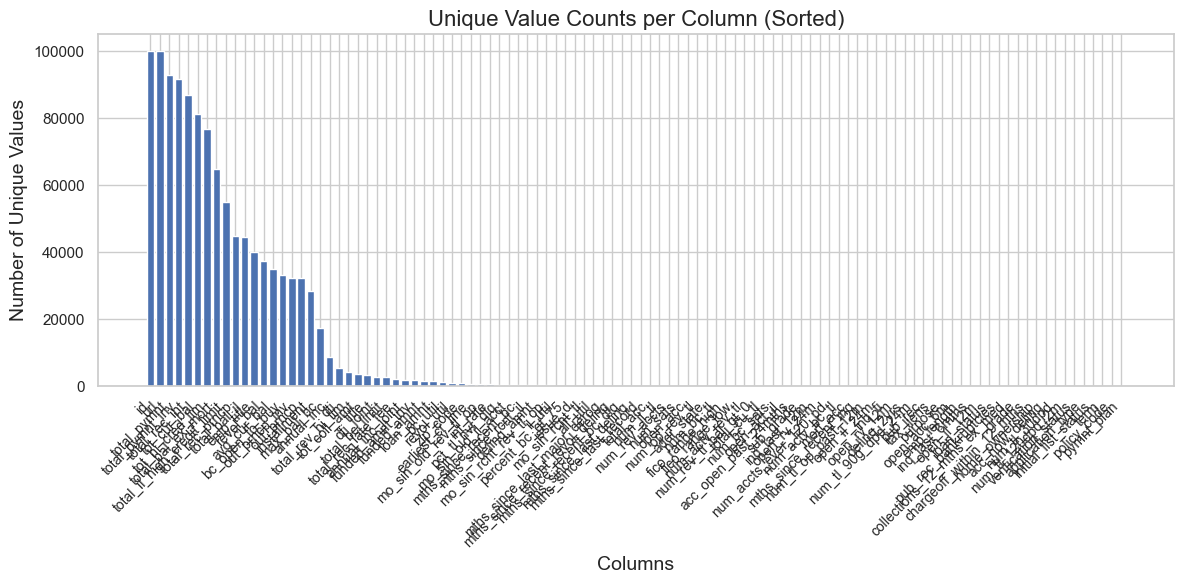

In [18]:
unique_counts = analyze_uniqueness(df[pre_hardship_fields_clean_kn])

Here we can see columns with 100% and 0% variability i.e. every row is unique or contains the same number. This is typical of unique identifiers and in our case policy codes. We can remove these as they won't be of any use to us for further analysis.

To simplify our data we'll remove 100%, 0%, and anythin less than 5%:

- 100% of values are unique = `id`, `url`
- 0% of values are unique = `policy_code`, `pymnt_plan`

We'll also take this opportunity to remove `unnamed:_0.1`, `unnamed:_0` too.

In [19]:
# List of columns to drop
columns_to_drop = ['unnamed:_0.1', 'unnamed:_0', 'id', 'url', 'policy_code', 'pymnt_plan']

# Remove specified columns from pre_hardship_fields_clean
pre_hardship_fields_clean_kn = [col for col in pre_hardship_fields_clean_kn if col not in columns_to_drop]

# Display the updated list
len(pre_hardship_fields_clean_kn)

100

The first two columns have been removed succesfully.

In [20]:
df[pre_hardship_fields_clean_kn].describe()

,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,annual_inc_joint,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,dti_joint,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,il_util,inq_fi,inq_last_12m,inq_last_6mths,installment,loan_amnt,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_act_il,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,revol_bal,tax_liens,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim
count,100000.000000,98222.000000,70343.000000,1.000000e+05,7.166000e+03,97560.000000,97152.000000,97101.000000,99994.00000,99994.000000,100000.00000,100000.000000,99898.000000,7166.000000,100000.000000,100000.000000,100000.000000,100000.000000,60315.000000,70356.000000,70356.000000,100000.000000,100000.000000,100000.000000,70356.000000,94627.000000,97562.000000,97562.000000,97562.000000,98222.000000,47186.000000,24602.000000,14630.000000,68227.000000,97212.000000,21943.000000,87190.000000,31658.000000,97562.000000,97562.000000,97562.000000,97949.000000,97562.000000,97562.000000,97562.000000,97562.000000,97562.000000,97949.000000,94488.000000,97562.000000,97562.000000,97562.000000,100000.000000,70356.000000,70356.000000,70356.000000,70356.000000,70356.000000,70356.000000,100000.000000,100000.000000,97558.000000,97133.000000,100000.00000,99955.000000,1.000000e+05,99995.000000,97562.000000,9.756200e+04,9.756200e+04,100000.000000,9.822200e+04,70356.000000,98222.000000,70356.000000,9.756200e+04,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,9.756200e+04
mean,0.003460,4.512166,56.154116,8.002918e+04,1.295764e+05,13757.234143,12779.260859,55.838138,0.00821,0.017651,0.28473,10.706750,19.332252,19.408330,704.639440,700.639200,15328.216250,15313.244829,68.988842,1.075232,1.998707,0.554310,451.708510,15332.373000,5999.964339,125.750589,179.950237,14.462444,8.325342,1.507839,35.034269,44.633322,74.945113,20.323259,25.101726,39.344392,7.094151,36.186525,0.483631,3.702671,5.594074,4.858508,7.635350,8.558486,8.266138,13.785039,5.550563,11.699834,0.000445,0.002306,0.075306,2.080523,11.688690,0.928037,0.703906,1.616351,2.839175,1.250881,2.645076,4032.024853,4031.436341,94.356537,40.051512,0.17770,0.123315,1.689349e+04,0.036772,208.056907,1.459264e+05,1.838475e+05,24.040390,5.279150e+04,36927.159276,24834.481664,1.517497,4.561308e+04,12559.494957,12544.530188,2479.307829,1.750509,9911.414064,3.639794e+04
std,0.063467,3.173066,20.804306,8.722434e+04,6.799755e+04,16693.219964,18099.386315,28.842058,0.10229,0.144291,0.82352,694.930099,17.278045,7.930092,33.802025,33.800996,9467.415275,9470.918891,23.482027,1.496386,2.349284,0.862704,273.022605,9468.189883,5513.920539,54.481015,98.402816,17.989124,9.267053,1.870317,21.915370,21.624549,26.560238,25.242757,32.514952,22.551510,5.971433,22.208072,1.347680,2.380707,3.411094,3.116711,4.694096,7.432067,4.786651,8.035361,3.339014,5.759304,0.021575,0.051073,0.456554,1.844204,5.754573,1.132691,0.941330,1.595079,3.034160,1.491800,2.560293,7465.243079,7464.709160,8.926635,36.068887,0.55075,0.354398,2.239829e+04,0.365740,1680.478192,1.644569e+05,1.840932e+05,12.055591,5.172936e+04,46072.927224,24487.591805,2.719705,4.693562e+04,10337.364917,10333.630505,2766.019201,13.416653

Let's start by converting our data into lists for further processing.

In [21]:
def split_data_frame(features_list, df):
    """
    Splits the provided DataFrame into three lists containing Boolean, Numerical, and Categorical column names.
    Converts floats with trailing zeros into integers where appropriate and replaces NaN values 
    with 0 for integers and 0.00 for floats.

    Parameters:
    features_list (list): List of column names to be checked.
    df (pd.DataFrame): The input DataFrame to split.

    Returns:
    tuple: A tuple containing three lists (boolean_cols, numerical_cols, categorical_cols).
    """
    boolean_cols, numerical_cols, categorical_cols = [], [], []

    # Define acceptable boolean values
    acceptable_boolean_values = {0, 1, True, False, 0.0, 1.0}

    # Helper function to classify column types
    def classify_column(col):
        if col not in df.columns:
            print(f"Warning: Column '{col}' not found in DataFrame.")
            return

        column_series = df[col]

        # Classify Boolean columns
        if pd.api.types.is_bool_dtype(column_series) or all(column_series.dropna().isin(acceptable_boolean_values)):
            boolean_cols.append(col)
        
        # Classify Numerical columns
        elif pd.api.types.is_numeric_dtype(column_series):
            if column_series.dtype == 'float64' and all(column_series.dropna() == column_series.dropna().astype(int)):
                df[col] = column_series.fillna(0).astype(int)
            else:
                df[col] = column_series.fillna(0 if column_series.dtype == 'int64' else 0.00)
            numerical_cols.append(col)
        
        # Classify Categorical columns
        else:
            categorical_cols.append(col)

    # Iterate over each feature to classify
    for col in features_list:
        classify_column(col)

    # Print a summary of column counts
    print(f"Summary of column counts:")
    print(f"Boolean columns: {len(boolean_cols)}")
    print(f"Numerical columns: {len(numerical_cols)}")
    print(f"Categorical columns: {len(categorical_cols)}")
    print(f"Total features processed: {len(features_list)}")

    return boolean_cols, numerical_cols, categorical_cols

# Example usage:
# boolean_list, numerical_list, categorical_list = split_data_frame(new_features, df)


##### Numerical Processing

In [22]:
def analyze_numeric_columns(numeric_cols, dataframe):
    """
    Analyze and visualize numeric columns in a DataFrame.

    Parameters:
    numeric_cols (list): List of numeric column names to analyze.
    dataframe (pd.DataFrame): The DataFrame containing the data.
    """
    for column in numeric_cols:
        print(f"\nSummary Statistics and Analysis for Numeric Column: {column}")

        # Check if the column exists in the DataFrame
        if column not in dataframe.columns:
            print(f" '{column}' is not found in the DataFrame. Skipping...")
            continue

        # Ensure the column is converted to numeric
        dataframe.loc[:, column] = pd.to_numeric(dataframe[column], errors='coerce')

        # Drop NaN values to ensure we have numeric data for analysis
        numeric_data = dataframe[column].dropna()

        if numeric_data.empty:
            print(f"No valid numeric data available for column: {column}. Skipping...")
            continue  # Skip the column if there's no valid data

        # Calculate z-scores
        z_scores = (numeric_data - numeric_data.mean()) / numeric_data.std()

        # Calculate IQR
        Q1 = numeric_data.quantile(0.25)
        Q3 = numeric_data.quantile(0.75)
        IQR = Q3 - Q1

        # Identify outliers based on z-scores (z > 3 or z < -3)
        outliers_z = numeric_data[(z_scores > 3) | (z_scores < -3)]

        # Identify outliers based on IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_iqr = numeric_data[(numeric_data < lower_bound) | (numeric_data > upper_bound)]

        # Create a figure for the distribution and box plot
        fig, axs = plt.subplots(1, 2, figsize=(FIG_WIDTH, FIG_HEIGHT))

        # Distribution plot (histogram)
        sns.histplot(numeric_data, kde=True, bins=10, ax=axs[0])
        axs[0].set_title(f'Distribution of {column}')
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Frequency')

        # Box plot for outlier detection
        sns.boxplot(x=numeric_data, ax=axs[1])
        axs[1].set_title(f'Box Plot for {column} (Outlier Detection)')
        axs[1].set_xlabel(column)

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

        # Summary Statistics
        print(f"\nSummary Statistics for Numeric  '{column}':")
        print(numeric_data.describe())

        # Interquartile Range (IQR)
        print(f"\nInterquartile Range (IQR): {IQR:.4f}")
        print(f"Lower Bound for Outliers (IQR method): {lower_bound:.4f}")
        print(f"Upper Bound for Outliers (IQR method): {upper_bound:.4f}")
        print(f"Number of Outliers (IQR method): {len(outliers_iqr)}")

        # Display outliers based on IQR
        #if not outliers_iqr.empty:
        #    print("\nOutliers detected using the IQR method:")
        #    print(outliers_iqr)
        #else:
        #    print("\nNo outliers detected using the IQR method.")

        # Z-scores
        print("\nZ-score Summary:")
        print(z_scores.describe())

        print(f"\nNumber of Outliers (Z-score method): {len(outliers_z)}")

        # Display outliers based on Z-scores
        #if not outliers_z.empty:
        #    print("\nOutliers detected using the Z-score method:")
        #    print(outliers_z)
        #else:
        #    print("\nNo outliers detected using the Z-score method.")

        # Skewness
        skewness_value = skew(numeric_data)
        print(f"\nSkewness: {skewness_value:.4f}")

        # Normality Tests
        print("\nNormality Tests:")
        # D'Agostino's K^2 Test
        k2_stat, k2_p = normaltest(numeric_data)
        print(f"D'Agostino's K^2 Test: Statistic={k2_stat:.4f}, p-value={k2_p:.4f}")

        # Shapiro-Wilk Test
        shapiro_stat, shapiro_p = shapiro(numeric_data)
        print(f"Shapiro-Wilk Test: Statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

        # Anderson-Darling Test
        anderson_result = anderson(numeric_data)
        print(f"Anderson-Darling Test: Statistic={anderson_result.statistic:.4f}")
        #for i in range(len(anderson_result.critical_values)):
        #    sl, cv = anderson_result.significance_level[i], anderson_result.critical_values[i]
        #    if anderson_result.statistic < cv:
        #        result = "Accept"
        #    else:
        #        result = "Reject"
        #    print(f"At {sl}% significance level, critical value: {cv:.4f}, {result} the null hypothesis of normality")

        # Kolmogorov-Smirnov Test against normal distribution
        # ks_stat, ks_p = kstest(numeric_data, 'norm', args=(numeric_data.mean(), numeric_data.std()))
        # print(f"Kolmogorov-Smirnov Test: Statistic={ks_stat:.4f}, p-value={ks_p:.4f}")


##### Boolean Processing

In [23]:
def analyze_boolean_columns(boolean_cols, dataframe):
    """
    Analyze and visualize boolean columns in a DataFrame.

    Parameters:
    boolean_cols (list): List of boolean column names to analyze.
    dataframe (pd.DataFrame): The DataFrame containing the data.
    """
    for column in boolean_cols:
        print(f"\nSummary Statistics and Analysis for Boolean Column: {column}")

        # Check if the column exists in the DataFrame
        if column not in dataframe.columns:
            print(f"'{column}' is not found in the DataFrame. Skipping...")
            continue

        # Cast the column to boolean in case it contains 1/0 or other non-boolean values
        dataframe[column] = dataframe[column].astype(bool)

        # Prepare boolean counts
        boolean_counts = dataframe[column].value_counts()

        # Create a figure with two subplots
        fig, axs = plt.subplots(1, 2, figsize=(FIG_WIDTH, FIG_HEIGHT)) # Configured at the beginning of the file for image consistancy

        # Bar plot using 'x' parameter
        sns.countplot(
            x=column,
            data=dataframe,
            ax=axs[0]
        )
        axs[0].set_title(f'Boolean Distribution for {column}')
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Count')

        # Pie chart on the right subplot
        boolean_counts.plot.pie(
            autopct='%1.1f%%',
            ax=axs[1],
            startangle=90
        )
        axs[1].set_title(f'Proportion of True/False for {column}')
        axs[1].set_ylabel('')

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

        # Display summary statistics for boolean data
        print(f"\nSummary for Boolean '{column}':")
        true_count = boolean_counts.get(True, 0)
        false_count = boolean_counts.get(False, 0)
        total_count = true_count + false_count
        true_percentage = (true_count / total_count) * 100 if total_count > 0 else 0

        print(f"Count of True: {true_count}")
        print(f"Count of False: {false_count}")
        print(f"Percentage of True: {true_percentage:.2f}%")


##### Categorical Processing

In [24]:
def analyze_categorical_columns(categorical_cols, dataframe):
    """
    Analyze and visualize categorical columns in a DataFrame.

    Parameters:
    categorical_cols (list): List of categorical column names to analyze.
    dataframe (pd.DataFrame): The DataFrame containing the data.
    """
    for column in categorical_cols:
        print(f"\nSummary Statistics and Analysis for Categorical Column: {column}")

        # Check if the column exists in the DataFrame
        if column not in dataframe.columns:
            print(f" '{column}' is not found in the DataFrame. Skipping...")
            continue

        # Prepare category counts and percentages
        category_counts = dataframe[column].value_counts()
        category_percentages = dataframe[column].value_counts(normalize=True) * 100

        # Display bar plot and pie chart
        fig, axs = plt.subplots(1, 2, figsize=(FIG_WIDTH, FIG_HEIGHT))

        # Bar plot using 'x' parameter
        sns.countplot(
            x=column,
            data=dataframe,
            ax=axs[0]
        )
        axs[0].set_title(f'Frequency Distribution for {column} (Categorical Data)')
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')

        # Pie chart on the right subplot
        category_counts.plot.pie(
            autopct='%1.1f%%',
            ax=axs[1],
            title=f'Proportion of Categories for {column}',
            startangle=90
        )
        axs[1].set_ylabel('')

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

        print(f"\nFrequency Table for '{column}':")
        freq_table = pd.DataFrame({'Count': category_counts, 'Percentage': category_percentages})
        print(freq_table)


This calls the split_data_frame function above create three lists to capture the sorting outputs in. 

These will later be used to pull some graphs to evaluate the data and what possible transformations we've missed.


In [25]:
# Create lists of data for further analysis
boolean_list, numerical_list, categorical_list = split_data_frame(pre_hardship_fields_clean_kn, df) # first input variable is the features we're interested in the second the data frame that contains the values.

Summary of column counts:
Boolean columns: 0
Numerical columns: 82
Categorical columns: 18
Total features processed: 100


### 01 Data Preparation and Cleaning

Perform thorough data cleaning on the provided dataset, including but not limited to the following steps:

* Handling missing values (imputation or removal)
* Converting data types to appropriate formats
* Removing duplicate records
* Detecting and handling outliers
* Encoding categorical variables

In [26]:
# Cross table of data types in df
dtype_crosstab = df[pre_hardship_fields_clean_kn].dtypes.value_counts().reset_index()
dtype_crosstab.columns = ['Data Type', 'Count']

# Display the cross table
dtype_crosstab

,Data Type,Count
0,int32,54
1,object,18
2,float64,16
3,int64,12


In [27]:
df[pre_hardship_fields_clean_kn].head()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,dti_joint,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,home_ownership,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,loan_status,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_act_il,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,verification_status,zip_code
0,0,1,NY,59,48000.0,0.0,Individual,64756,0,0.0,0,1,1,0,20.25,0.0,Dec-04,10+ years,cashier,669,665,4000,4000.0,B,MORTGAGE,56,w,1,0,0,134.93,13.08%,Mar-20,4000,Current,0,179,75,38,16,2,19,0,110,16,0,19,16,19,1,0,2,0,1,5,2,5,2,4,0,0,0,0,4,0,0,1,1,0,0,3816.34,3816.34,75.0,0.0,1,1,home_improvement,1988,82.80%,B5,0,36 months,Home improvement,3832,259024,395328,12,11948,9960,0,0,17928,266.950000,266.95,83.29,0.0,183.66,2400,Source Verified,115xx
1,0,4,LA,67,57000.0,0.0,Individual,6182,7741,40.5,0,0,0,0,25.33,0.0,Jan-04,6 years,ABM,684,680,24000,24000.0,B,RENT,72,w,0,0,0,500.07,9.16%,Feb-16,24000,Current,2137,145,137,7,7,0,0,0,0,14,7,0,24,0,0,3,5,5,6,15,7,9,5,10,0,0,0,1,10,0,0,3,3,1,1,4333.29,4333.29,95.8,60.0,0,0,credit_card,22697,64.50%,B2,0,60 months,Credit card refinancing,0,61815,88154,24,61815,39118,13000,7,52954,25496.160000,25496.16,5829.45,0.0,19666.71,35200,Source Verified,708xx
2,0,4,FL,0,55000.0,0.0,Individual,22733,4521,54.8,0,0,0,0,7.22,0.0,Apr-10,10+ years,driver,669,665,5000,5000.0,B,MORTGAGE,0,f,0,0,0,162.49,10.49%,Jan-15,5000,Fully Paid,0,57,57,14,9,1,0,0,61,0,14,0,1,0,0,3,5,3,3,2,5,6,5,7,0,0,0,1,7,0,0,0,0,0,0,0.00,0.00,100.0,33.3,1,0,credit_card,6001,52.60%,B3,1,36 months,Credit card refinancing,0,159131,171118,9,13124,0,10000,0,7526,5846.672836,5846.67,846.67,0.0,5000.00,11400,Not Verified,347xx
3,0,4,OH,25,43500.0,0.0,Individual,6973,43140,12.0,0,0,0,0,24.55,0.0,Oct-05,NaN,NaN,754,750,24000,24000.0,B,MORTGAGE,60,w,2,2,0,522.42,11.05%,Jun-18,24000,Current,2223,37,132,1,1,2,0,0,0,17,1,0,3,0,1,6,7,11,16,2,13,19,7,15,0,0,0,2,15,2,0,1,1,2,3,16317.69,16317.69,95.7,0.0,0,0,debt_consolidation,6573,12.10%,B4,0,60 months,Debt consolidation,0,104590,202606,23,18520,11947,49000,0,20000,12000.930000,12000.93,4318.62,0.0,7682.31,54500,Not Verified,443xx
4,0,5,NE,43,48000.0,0.0,Individual,5641,17318,39.9,0,0,0,0,24.30,0.0,Apr-08,10+ years,Shipping Clerk,739,735,14000,14000.0,C,MORTGAGE,60,w,1,2,1,322.79,13.59%,Jan-18,14000,Fully Paid,3907,72,117,6,6,2,0,0,0,7,6,0,5,0,0,4,5,5,6,5,13,16,5,16,0,0,0,4,16,2,1,1,2,3,4,0.00,0.00,100.0,0.0,0,0,debt_consolidation,11894,27.10%,C2,0,60 months,Debt consolidation,0,90253,152081,23,34847,22953,28800,0,38181,16605.680000,16605.68,2605.68,0.0,14000.00,43900,Source Verified,681xx


#### Handling missing values (imputation or removal)

Let's import missingno and check our data for missing data correlations.

In [28]:
import missingno as msno

Let's check for missing data using missingno

In [29]:
# Check for missing values in each column
missing_values = df[pre_hardship_fields_clean_kn].isnull().sum().sort_values(ascending=False)
print(f"There is a total of: {len(missing_values)} columns that are missing data\n")

missing_values[missing_values > 0] # Display only columns with missing values > X

There is a total of: 100 columns that are missing data



emp_title     8954
emp_length    6950
title          780
revol_util      81
dtype: int64

Data Missing Values



<Axes: >

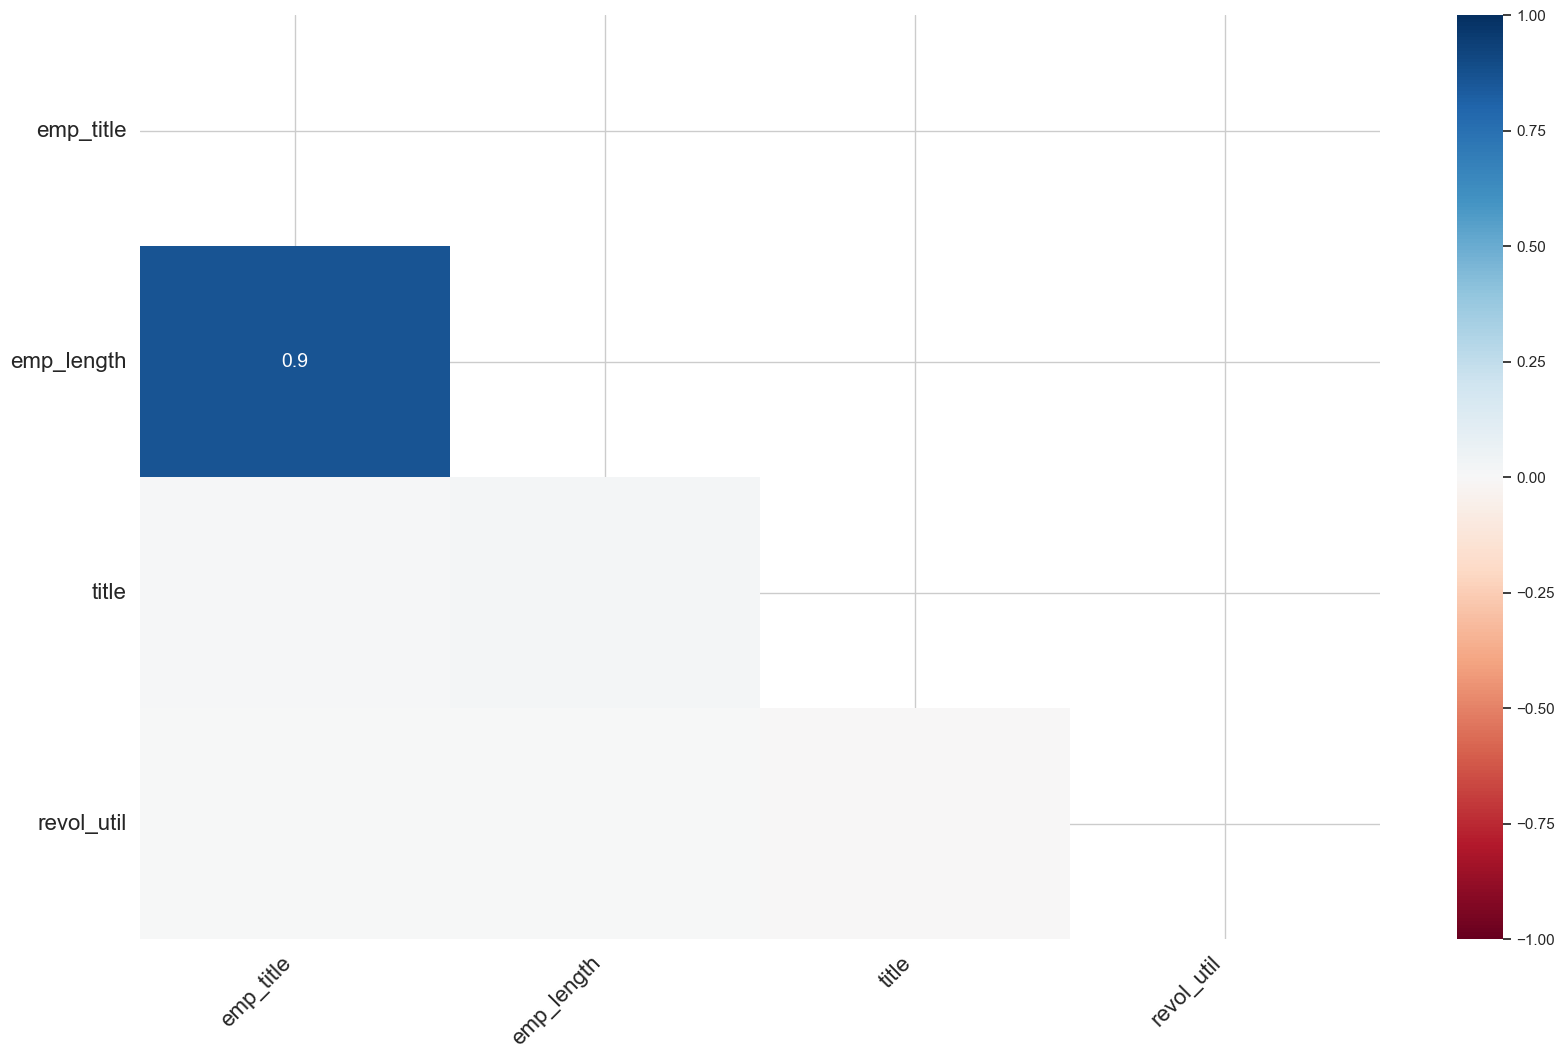

In [30]:
# Filter for columns with missing values greater than 0
missing_values_graph = df[pre_hardship_fields_clean_kn][missing_values[missing_values > 0].index]

print("Data Missing Values\n")

# Visualize the missing data using the missingno library
msno.heatmap(missing_values_graph)
# msno.dendrogram(missing_values_graph) #removed for the final anlysis to avoid cluttering the document with the same data but a different way to show it

Looking at our results we can make the assumption that several columns are derivatives or linked in some shape or form to others due to the exact count of missing data.

Let's align some of the post_hardship_fields

In [31]:
# Correct references to 'completed' to 'complete' in the 'hardship_status' column
df['hardship_status'] = df['hardship_status'].replace('COMPLETED', 'COMPLETE')

In [32]:
df['hardship_status'].value_counts()

hardship_status
ACTIVE      4166
COMPLETE     627
BROKEN       102
Name: count, dtype: int64

Let's plot our missing data and search for possible correlations.

##### Missing Data Strategy
Instead of dropping columns with a high number of missing values, we may want to retain them for our analysis. 

Following the logic of Abraham Wald's famous airplane and bullet hole logic, it is beneficial to analyse the data we don't have rather than discard potentially useful data i.e. the absence of one is a indicator in its own right.

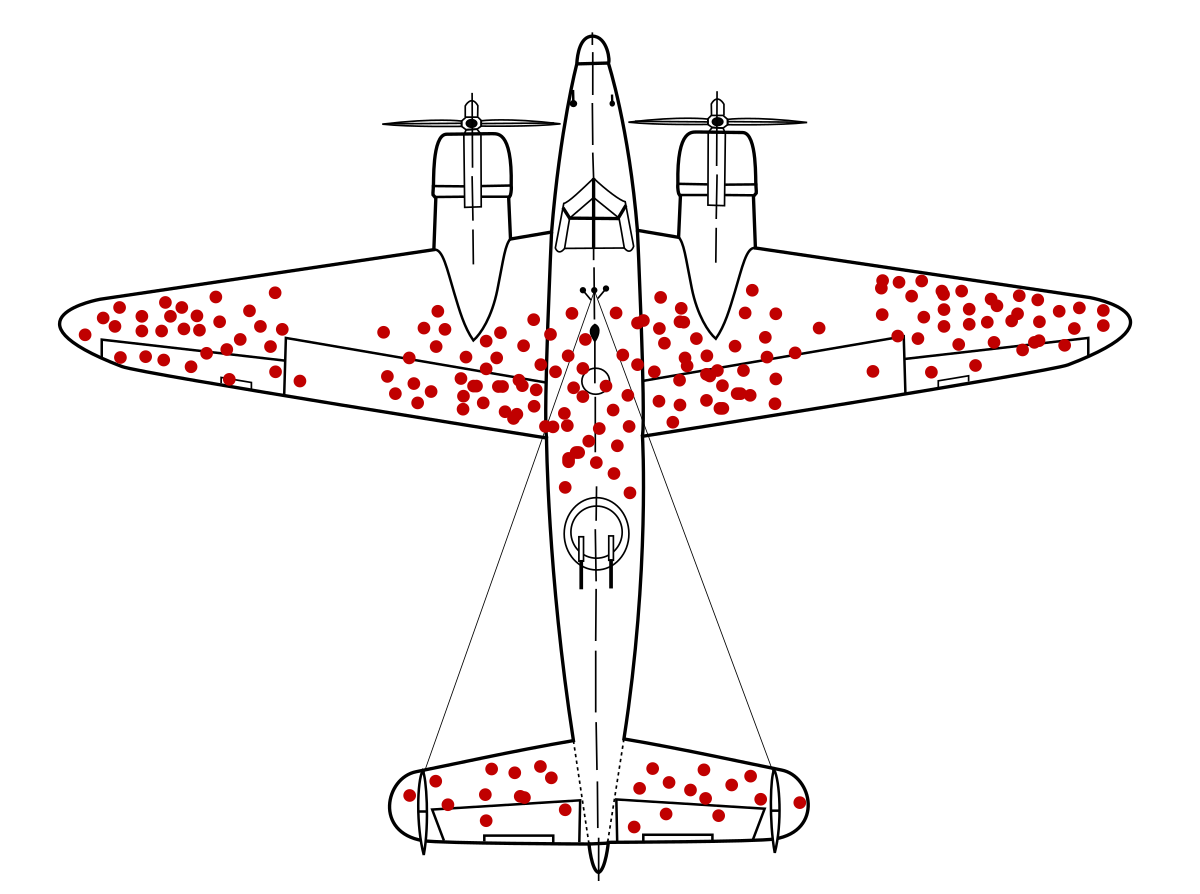

##### Creating Missing Value Indicators

To reiterate instead of dropping columns or rows with missing data, we create missing value indicators for the columns with missing entries that we feel would be good indicators/features for loan application approvals.

This means that for each column with missing values, a new binary indicator column is created, where `1` represents a missing value and `0` indicates that a value was present. 

This approach ensures that we retain as much information as possible from the original dataset while also capturing the fact that missing values themselves may provide valuable insight. For instance, missing income information could be an indicator of a higher default risk and by proxy maybe something that should reduce the score attributed to a client.

#### Converting data types to appropriate formats

Let's start by calling our split_list_function which will create three seperate lists from our data frame which we can then use for our analysis.

In [33]:
df_dropped = df[pre_hardship_fields_clean_kn].copy()

In [34]:
df_dropped.shape

(100000, 100)

Here we can see that our data contains 3 boolean values. 2 of which we created earlier as markers for active hardship and joint applications.

In [35]:
df_dropped[categorical_list].head()

,addr_state,application_type,earliest_cr_line,emp_length,emp_title,grade,home_ownership,initial_list_status,int_rate,issue_d,loan_status,purpose,revol_util,sub_grade,term,title,verification_status,zip_code
0,NY,Individual,Dec-04,10+ years,cashier,B,MORTGAGE,w,13.08%,Mar-20,Current,home_improvement,82.80%,B5,36 months,Home improvement,Source Verified,115xx
1,LA,Individual,Jan-04,6 years,ABM,B,RENT,w,9.16%,Feb-16,Current,credit_card,64.50%,B2,60 months,Credit card refinancing,Source Verified,708xx
2,FL,Individual,Apr-10,10+ years,driver,B,MORTGAGE,f,10.49%,Jan-15,Fully Paid,credit_card,52.60%,B3,36 months,Credit card refinancing,Not Verified,347xx
3,OH,Individual,Oct-05,NaN,NaN,B,MORTGAGE,w,11.05%,Jun-18,Current,debt_consolidation,12.10%,B4,60 months,Debt consolidation,Not Verified,443xx
4,NE,Individual,Apr-08,10+ years,Shipping Clerk,C,MORTGAGE,w,13.59%,Jan-18,Fully Paid,debt_consolidation,27.10%,C2,60 months,Debt consolidation,Source Verified,681xx


It looks as if there are numerical values we can convert.

Let's explore our categorical values in search of dtypes that we can convert to numercial (int, float) values.

In [36]:
import re

# List to store features that contain any numerical values (even within mixed text)
categorical_list_with_numerical_values = []

# Iterate through each column in categorical_list
for column in categorical_list:
    # Check if the column contains any values with numerical characters
    if df_dropped[column].apply(lambda x: bool(re.search(r'\d', str(x)))).any():
        categorical_list_with_numerical_values.append(column)
        print(f" '{column}' contains numerical values.")

 'earliest_cr_line' contains numerical values.
 'emp_length' contains numerical values.
 'emp_title' contains numerical values.
 'int_rate' contains numerical values.
 'issue_d' contains numerical values.
 'loan_status' contains numerical values.
 'revol_util' contains numerical values.
 'sub_grade' contains numerical values.
 'term' contains numerical values.
 'title' contains numerical values.
 'zip_code' contains numerical values.


Let's print our list for easy copy and pasting.

In [37]:
df_dropped[categorical_list_with_numerical_values].columns

Index(['earliest_cr_line', 'emp_length', 'emp_title', 'int_rate', 'issue_d',
       'loan_status', 'revol_util', 'sub_grade', 'term', 'title', 'zip_code'],
      dtype='object')

In [38]:
df_dropped[categorical_list_with_numerical_values].head()

,earliest_cr_line,emp_length,emp_title,int_rate,issue_d,loan_status,revol_util,sub_grade,term,title,zip_code
0,Dec-04,10+ years,cashier,13.08%,Mar-20,Current,82.80%,B5,36 months,Home improvement,115xx
1,Jan-04,6 years,ABM,9.16%,Feb-16,Current,64.50%,B2,60 months,Credit card refinancing,708xx
2,Apr-10,10+ years,driver,10.49%,Jan-15,Fully Paid,52.60%,B3,36 months,Credit card refinancing,347xx
3,Oct-05,NaN,NaN,11.05%,Jun-18,Current,12.10%,B4,60 months,Debt consolidation,443xx
4,Apr-08,10+ years,Shipping Clerk,13.59%,Jan-18,Fully Paid,27.10%,C2,60 months,Debt consolidation,681xx


Let's explore our data to avoid creating graphs for rows that contain unique values. To do this we'll run a bar chart.

In [39]:
def analyze_categorical_uniqueness(df, columns):
    """
    Analyzes the number of unique values in categorical columns and 
    helps identify suitable candidates for visualization.

    Args:
        df: The Pandas DataFrame.
        columns: A list of column names to analyze.

    Returns:
        A dictionary where keys are column names and values are 
        the number of unique values in each column. Also, 
        prints a summary to assist visualizing the results via bar graphs.
    """
    uniqueness_counts = {}
    for col in columns:
        if not pd.api.types.is_object_dtype(df[col]):  # checks for object type; adjust if needed
            continue  # Skip analysis for non-categorical columns
        
        unique_count = df[col].nunique()  # use nunique for direct count of unique values
        uniqueness_counts[col] = unique_count

    # Sort the dictionary by unique counts in descending order
    sorted_uniqueness_counts = dict(sorted(uniqueness_counts.items(), key=lambda item: item[1], reverse=True))

    # Print sorted output with unique counts
    print("Sorted Unique Value Counts:")
    for col, unique_count in sorted_uniqueness_counts.items():
        print(f"Number of unique values in '{col}': {unique_count}")

    # Create a bar graph to visualize the number of unique values, sorted from high to low
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_uniqueness_counts.keys(), sorted_uniqueness_counts.values())
    plt.xlabel("Categorical Columns", fontsize=14)
    plt.ylabel("Number of Unique Values", fontsize=14)
    plt.title("Unique Value Counts per Categorical Column (Sorted)", fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust subplot parameters for a tight layout
    plt.show()

    return sorted_uniqueness_counts




# Example usage:

#categorical_uniqueness = analyze_categorical_uniqueness(df_dropped, categorical_list_with_numerical_values)
#columns_for_visualization = [col for col, count in categorical_uniqueness.items() if count <= 15] # Example: Use only below or equal to 10
#print(f"\nSuggested columns for visualization (<= 15 unique values): {columns_for_visualization}")


Sorted Unique Value Counts:
Number of unique values in 'emp_title': 40094
Number of unique values in 'title': 3454
Number of unique values in 'revol_util': 1088
Number of unique values in 'zip_code': 878
Number of unique values in 'earliest_cr_line': 667
Number of unique values in 'int_rate': 584
Number of unique values in 'issue_d': 159
Number of unique values in 'sub_grade': 35
Number of unique values in 'emp_length': 11
Number of unique values in 'loan_status': 10
Number of unique values in 'term': 2


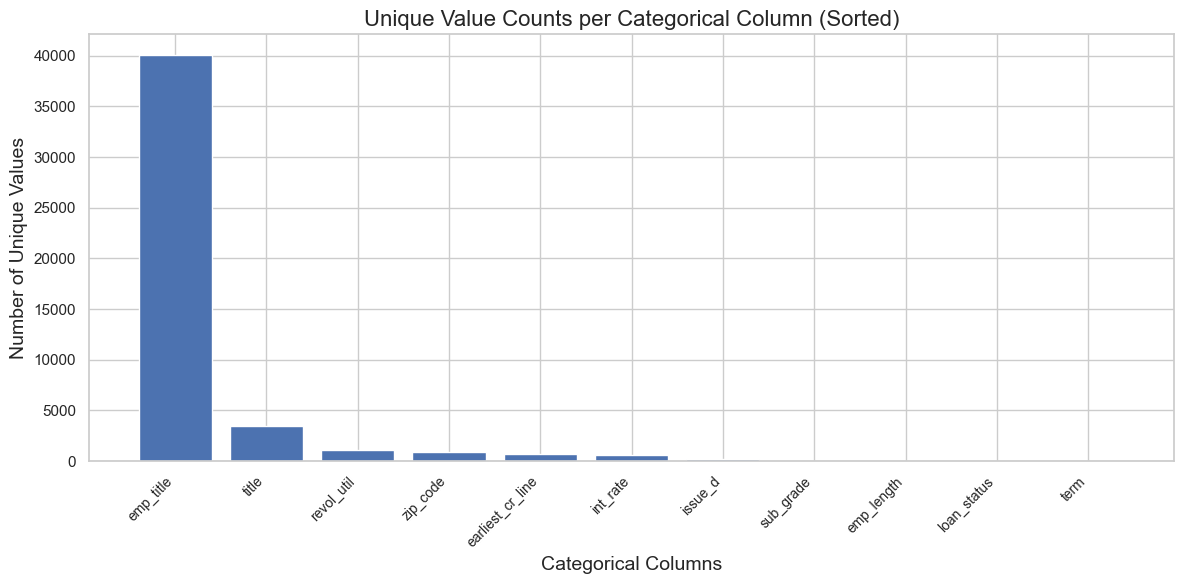


Suggested columns for visualization (<= 15 unique values): ['loan_status', 'term']


In [40]:
categorical_uniqueness = analyze_categorical_uniqueness(df, categorical_list_with_numerical_values)

columns_for_visualization = [col for col, count in categorical_uniqueness.items() if count <= 10] # Example: Use only below or equal to 10

print(f"\nSuggested columns for visualization (<= 15 unique values): {columns_for_visualization}")

Straight away we can see `int_rate` (584),`emp_title` (40049), `issue_d` (159),`title` (3454), `revol_util` (1088), `last_pymnt_d` (147), `earliest_cr_line` (667), `sec_app_earliest_cr_line` (506), `last_credit_pull` (137). `zip_code` (878) stand out, we'll remove these as graphically representing these won't produce any meaningful insight. However, we'll see if we can reduce them into logical groupings later on.


Summary Statistics and Analysis for Categorical Column: emp_length


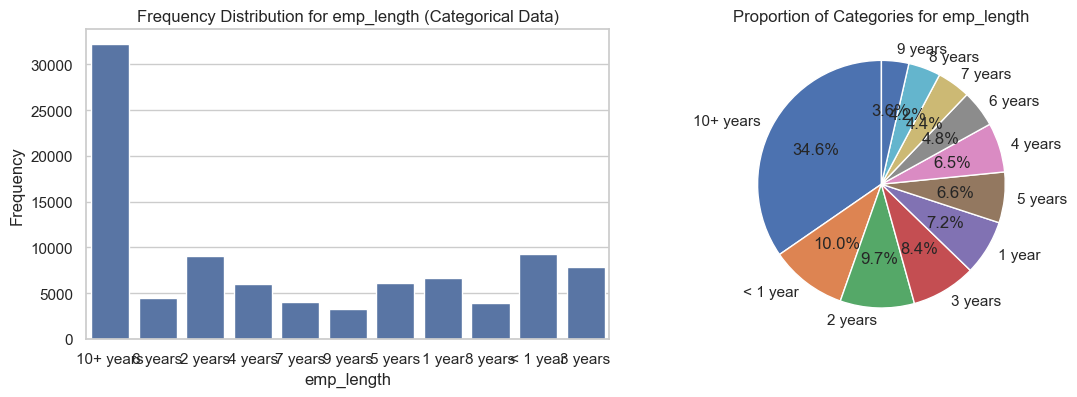


Frequency Table for 'emp_length':
            Count  Percentage
emp_length                   
10+ years   32207   34.612574
< 1 year     9306   10.001075
2 years      9014    9.687265
3 years      7862    8.449221
1 year       6714    7.215476
5 years      6158    6.617947
4 years      6009    6.457818
6 years      4496    4.831811
7 years      4051    4.353573
8 years      3919    4.211714
9 years      3314    3.561526

Summary Statistics and Analysis for Categorical Column: loan_status


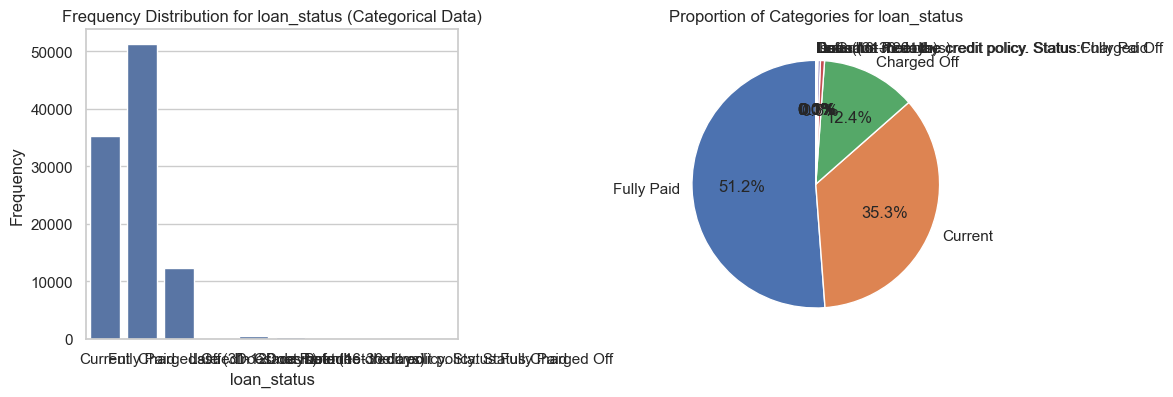


Frequency Table for 'loan_status':
                                                    Count  Percentage
loan_status                                                          
Fully Paid                                          51189      51.189
Current                                             35294      35.294
Charged Off                                         12384      12.384
Late (31-120 days)                                    535       0.535
In Grace Period                                       329       0.329
Late (16-30 days)                                      90       0.090
Does not meet the credit policy. Status:Fully Paid     69       0.069
Issued                                                 63       0.063
Does not meet the credit policy. Status:Charged...     33       0.033
Default                                                14       0.014

Summary Statistics and Analysis for Categorical Column: sub_grade


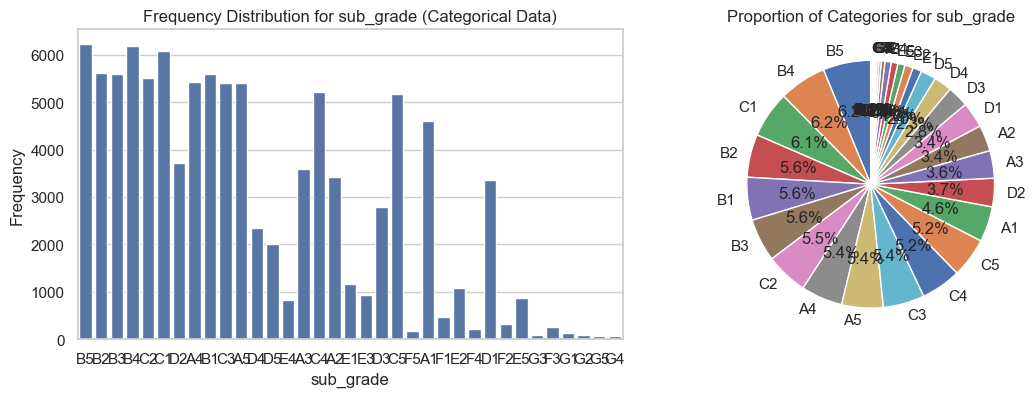


Frequency Table for 'sub_grade':
           Count  Percentage
sub_grade                   
B5          6225       6.225
B4          6187       6.187
C1          6075       6.075
B2          5609       5.609
B1          5599       5.599
B3          5596       5.596
C2          5513       5.513
A4          5426       5.426
A5          5415       5.415
C3          5410       5.410
C4          5223       5.223
C5          5179       5.179
A1          4610       4.610
D2          3720       3.720
A3          3593       3.593
A2          3413       3.413
D1          3358       3.358
D3          2788       2.788
D4          2344       2.344
D5          2002       2.002
E1          1168       1.168
E2          1083       1.083
E3           932       0.932
E5           868       0.868
E4           821       0.821
F1           471       0.471
F2           310       0.310
F3           250       0.250
F4           212       0.212
F5           180       0.180
G1           134       0.134
G2       

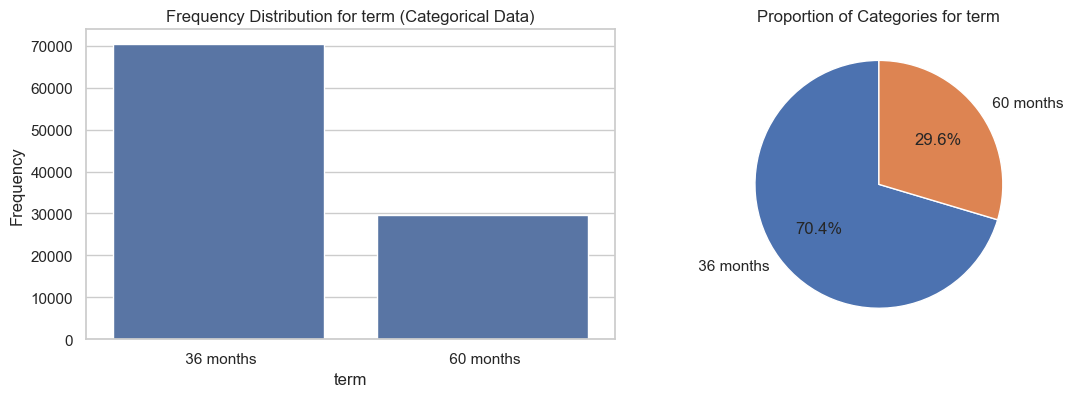


Frequency Table for 'term':
           Count  Percentage
term                        
36 months  70384      70.384
60 months  29616      29.616


In [41]:
exclude_list = ['int_rate', 'zip_code', 'emp_title', 'issue_d', 'title', 'revol_util', 'last_pymnt_d', 'earliest_cr_line', 'sec_app_earliest_cr_line', 'last_credit_pull_d']

# Filter the categorical columns to exclude specified ones
filtered_categorical_columns = [col for col in categorical_list_with_numerical_values if col not in exclude_list]

# Analyze the filtered categorical columns
analyze_categorical_columns(filtered_categorical_columns, df_dropped)

#### Actions Post-Analysis

##### Convert String to Integer
- **term**: Extract numerical part and convert to integer (keep `36` and `60`).
- **emp_length**: Extract numerical years and convert to integer.

##### Convert String to Float
- **int_rate**: Convert to float after removing any non-numeric characters.
- **revol_util**: Convert to float after removing the "%" symbol.

##### Encode Categorical Values
- **sub_grade**: Use as is or encode if necessary; consider dropping **grade** if redundant.
- **loan_status**: Group or encode based on loan status levels.
- **hardship_loan_status**: Analyze and group similar hardship statuses if logical.

##### Convert to Date/Time Format
- **issue_d**: Convert to date/time for chronological analysis.
- **earliest_cr_line**: Convert to date/time to track the earliest credit history.
- **last_pymnt_d**: Convert to date/time; create separate year and month columns.
- **next_pymnt_d**: Convert to date/time; add year and month columns.
- **last_credit_pull_d**: Convert to date/time for recent credit activity insights.
- **sec_app_earliest_cr_line**: Convert to date/time for secondary applicants’ credit history.
- **hardship_start_date**: Convert to date/time; add year and month columns.
- **hardship_end_date**: Convert to date/time; add year and month columns.
- **payment_plan_start_date**: Convert to date/time; add year and month columns.

##### Remove Non-Analytical or Irrelevant Columns
- **emp_title**: Not relevant for numerical analysis; remove.
- **url**: Non-analytical; remove as it doesn’t contribute to analysis.
- **hardship_type**: Potentially skewed and may lack analytical value; consider removal.

##### Evaluate for Categorical Consistency
- **title**: Check for consistent groupings and categorize if needed.
- **zip_code**: Analyze the first few digits if relevant to extract location-based insights.

Before running our graphical analysis let's start by filtering out categorical values with over 20 unique values.

#### Removing Features

In [42]:
# Remove specified columns from df
#df = df.drop(df.columns[[0, 1]], axis=1) # remove by index number, good for quick changes but hard to keep track of edits. Keeping for records.
df_dropped[pre_hardship_fields_clean_kn].drop(columns=['zip_code']) # identified in the categorical data analysis
 
# Display the updated DataFrame
df_dropped.head()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,dti_joint,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,home_ownership,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,loan_status,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_act_il,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,verification_status,zip_code
0,0,1,NY,59,48000.0,0.0,Individual,64756,0,0.0,0,1,1,0,20.25,0.0,Dec-04,10+ years,cashier,669,665,4000,4000.0,B,MORTGAGE,56,w,1,0,0,134.93,13.08%,Mar-20,4000,Current,0,179,75,38,16,2,19,0,110,16,0,19,16,19,1,0,2,0,1,5,2,5,2,4,0,0,0,0,4,0,0,1,1,0,0,3816.34,3816.34,75.0,0.0,1,1,home_improvement,1988,82.80%,B5,0,36 months,Home improvement,3832,259024,395328,12,11948,9960,0,0,17928,266.950000,266.95,83.29,0.0,183.66,2400,Source Verified,115xx
1,0,4,LA,67,57000.0,0.0,Individual,6182,7741,40.5,0,0,0,0,25.33,0.0,Jan-04,6 years,ABM,684,680,24000,24000.0,B,RENT,72,w,0,0,0,500.07,9.16%,Feb-16,24000,Current,2137,145,137,7,7,0,0,0,0,14,7,0,24,0,0,3,5,5,6,15,7,9,5,10,0,0,0,1,10,0,0,3,3,1,1,4333.29,4333.29,95.8,60.0,0,0,credit_card,22697,64.50%,B2,0,60 months,Credit card refinancing,0,61815,88154,24,61815,39118,13000,7,52954,25496.160000,25496.16,5829.45,0.0,19666.71,35200,Source Verified,708xx
2,0,4,FL,0,55000.0,0.0,Individual,22733,4521,54.8,0,0,0,0,7.22,0.0,Apr-10,10+ years,driver,669,665,5000,5000.0,B,MORTGAGE,0,f,0,0,0,162.49,10.49%,Jan-15,5000,Fully Paid,0,57,57,14,9,1,0,0,61,0,14,0,1,0,0,3,5,3,3,2,5,6,5,7,0,0,0,1,7,0,0,0,0,0,0,0.00,0.00,100.0,33.3,1,0,credit_card,6001,52.60%,B3,1,36 months,Credit card refinancing,0,159131,171118,9,13124,0,10000,0,7526,5846.672836,5846.67,846.67,0.0,5000.00,11400,Not Verified,347xx
3,0,4,OH,25,43500.0,0.0,Individual,6973,43140,12.0,0,0,0,0,24.55,0.0,Oct-05,NaN,NaN,754,750,24000,24000.0,B,MORTGAGE,60,w,2,2,0,522.42,11.05%,Jun-18,24000,Current,2223,37,132,1,1,2,0,0,0,17,1,0,3,0,1,6,7,11,16,2,13,19,7,15,0,0,0,2,15,2,0,1,1,2,3,16317.69,16317.69,95.7,0.0,0,0,debt_consolidation,6573,12.10%,B4,0,60 months,Debt consolidation,0,104590,202606,23,18520,11947,49000,0,20000,12000.930000,12000.93,4318.62,0.0,7682.31,54500,Not Verified,443xx
4,0,5,NE,43,48000.0,0.0,Individual,5641,17318,39.9,0,0,0,0,24.30,0.0,Apr-08,10+ years,Shipping Clerk,739,735,14000,14000.0,C,MORTGAGE,60,w,1,2,1,322.79,13.59%,Jan-18,14000,Fully Paid,3907,72,117,6,6,2,0,0,0,7,6,0,5,0,0,4,5,5,6,5,13,16,5,16,0,0,0,4,16,2,1,1,2,3,4,0.00,0.00,100.0,0.0,0,0,debt_consolidation,11894,27.10%,C2,0,60 months,Debt consolidation,0,90253,152081,23,34847,22953,28800,0,38181,16605.680000,16605.68,2605.68,0.0,14000.00,43900,Source Verified,681xx


#### Encoding categorical variables

Let's inspect our categorical data for encoding opportunities. Let's check for categorical data with numerical values these are candidates for int and float transformations.

In [43]:
# Define the columns that need to convert 'Y' to 1 and 'N' to 0
columns_to_convert_binary = ['application_type','initial_list_status','verification_status']  # Add any additional columns here

# Initialize an empty list for new feature names
new_features = []

# Loop through each specified column
for column in columns_to_convert_binary:
    # Create a new column with '_clean_kn' suffix and map 'Y' to 1 and 'N' to 0
    df_dropped[f"{column}_kn"] = df_dropped[column].map({'Y': 1, 'N': 0})

    # Append the new column name to new_features if not already present
    new_col_name = f"{column}_kn"
    if new_col_name not in new_features:
        new_features.append(new_col_name)

#### Creating Features

Let's now focus on selecting variables we believe will be indicative of loan defaults.

In [44]:
# List of columns for creating missing value indicators
missing_value_indicator = ['addr_state', 'annual_inc', 'annual_inc_joint', 'application_type', 
 'emp_length', 'emp_title', 'home_ownership', 'purpose', 'title', 'verification_status',
 'loan_amnt', 'term', 'int_rate', 'installment']

In [45]:
# Create an empty list to store the new column names
new_missing_columns = []

# Iterating through the list to create missing value indicator columns
for col in missing_value_indicator:
    indicator_col_name = f"{col}_missing_clean_kn"  # Create a new column name for the missing indicator
    df_dropped[indicator_col_name] = df_dropped[col].isnull().astype(int)  # 1 for missing, 0 for not missing
    
    # Append the new column name to the list
    new_missing_columns.append(indicator_col_name)

# Display the list of new column names
print("New missing indicator columns:", new_missing_columns)
print("Count of New Missing Columns created", len(new_missing_columns))

# Example to verify the new columns
df_dropped.head()  # Display the first few rows to verify

New missing indicator columns: ['addr_state_missing_clean_kn', 'annual_inc_missing_clean_kn', 'annual_inc_joint_missing_clean_kn', 'application_type_missing_clean_kn', 'emp_length_missing_clean_kn', 'emp_title_missing_clean_kn', 'home_ownership_missing_clean_kn', 'purpose_missing_clean_kn', 'title_missing_clean_kn', 'verification_status_missing_clean_kn', 'loan_amnt_missing_clean_kn', 'term_missing_clean_kn', 'int_rate_missing_clean_kn', 'installment_missing_clean_kn']
Count of New Missing Columns created 14


,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,dti_joint,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,home_ownership,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,loan_status,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_act_il,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,verification_status,zip_code,application_type_kn,initial_list_status_kn,verification_status_kn,addr_state_missing_clean_kn,annual_inc_missing_clean_kn,annual_inc_joint_missing_clean_kn,application_type_missing_clean_kn,emp_length_missing_clean_kn,emp_title_missing_clean_kn,home_ownership_missing_clean_kn,purpose_missing_clean_kn,title_missing_clean_kn,verification_status_missing_clean_kn,loan_amnt_missing_clean_kn,term_missing_clean_kn,int_rate_missing_clean_kn,installment_missing_clean_kn
0,0,1,NY,59,48000.0,0.0,Individual,64756,0,0.0,0,1,1,0,20.25,0.0,Dec-04,10+ years,cashier,669,665,4000,4000.0,B,MORTGAGE,56,w,1,0,0,134.93,13.08%,Mar-20,4000,Current,0,179,75,38,16,2,19,0,110,16,0,19,16,19,1,0,2,0,1,5,2,5,2,4,0,0,0,0,4,0,0,1,1,0,0,3816.34,3816.34,75.0,0.0,1,1,home_improvement,1988,82.80%,B5,0,36 months,Home improvement,3832,259024,395328,12,11948,9960,0,0,17928,266.950000,266.95,83.29,0.0,183.66,2400,Source Verified,115xx,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,4,LA,67,57000.0,0.0,Individual,6182,7741,40.5,0,0,0,0,25.33,0.0,Jan-04,6 years,ABM,684,680,24000,24000.0,B,RENT,72,w,0,0,0,500.07,9.16%,Feb-16,24000,Current,2137,145,137,7,7,0,0,0,0,14,7,0,24,0,0,3,5,5,6,15,7,9,5,10,0,0,0,1,10,0,0,3,3,1,1,4333.29,4333.29,95.8,60.0,0,0,credit_card,22697,64.50%,B2,0,60 months,Credit card refinancing,0,61815,88154,24,61815,39118,13000,7,52954,25496.160000,25496.16,5829.45,0.0,19666.71,35200,Source Verified,708xx,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,4,FL,0,55000.0,0.0,Individual,22733,4521,54.8,0,0,0,0,7.22,0.0,Apr-10,10+ years,driver,669,665,5000,5000.0,B,MORTGAGE,0,f,0,0,0,162.49,10.49%,Jan-15,5000,Fully Paid,0,57,57,14,9,1,0,0,61,0,14,0,1,0,0,3,5,3,3,2,5,6,5,7,0,0,0,1,7,0,0,0,0,0,0,0.00,0.00,100.0,33.3,1,0,credit_card,6001,52.60%,B3,1,36 months,Credit card refinancing,0,159131,171118,9,13124,0,10000,0,7526,5846.672836,5846.67,846.67,0.0,5000.00,11400,Not Verified,347xx,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,4,OH,25,43500.0,0.0,Individual,6973,43140,12.0,0,0,0,0,24.55,0.0,Oct-05,NaN,NaN,754,750,24000,24000.0,B,MORTGAGE,60,w,2,2,0,522.42,11.05%,Jun-18,24000,Current,2223,37,132,1,1,2,0,0,0,17,1,0,3,0,1,6,7,11,16,2,13,19,7,15,0,0,0,2,15,2,0,1,1,2,3,16317.69,16317.69,95.7,0.0,0,0,debt_consolidation,6573,12.10%,B4,0,60 months,Debt consolidation,0,104590,202606,23,18520,11947,49000,0,20000,12000.930000,12000.93,4318.62,0.0,7682.31,54500,Not Verified,443xx,NaN,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,0,5,NE,43,48000.0,0.0,Individual,5641,17318,39.9,0,0,0,0,24.30,0.0,Apr-08,10+ years,Shipping Clerk,739,735,14000,14000.0,C,MORTGAGE,60,w,1,2,1,322

#### String to numerical

### Convert String to Integer
[x] **term**: Extract numerical part and convert to integer (keep `36` and `60`).

[x] **emp_length**: Extract numerical years and convert to integer.

In [46]:
import re

# Define the columns that need to be converted from string to integer
string_columns_to_convert_int = ['term', 'emp_length']  # features to replace with int values

# Convert each specified column to an integer in a new column
for column in string_columns_to_convert_int:
    # Extract numerical part and convert to integer
    df_dropped[f"{column}_kn"] = df_dropped[column].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if pd.notnull(x) else None)

# Drop the original string columns
df_dropped.drop(columns=string_columns_to_convert_int, inplace=True)

In [47]:
df_dropped[['term_kn','emp_length_kn']].head()

,term_kn,emp_length_kn
0,36,10.0
1,60,6.0
2,36,10.0
3,60,NaN
4,60,10.0


#### String to Float

In [48]:
import re

# Define the columns that need to be converted from string to float
string_columns_to_convert_float = ['int_rate', 'revol_util']  # features to replace with float values

# Convert each specified column to a float in a new column as percentage (e.g., 80% becomes 0.80)
for column in string_columns_to_convert_float:
    # Extract numerical part, convert to float, and divide by 100
    df_dropped[f"{column}_kn"] = df_dropped[column].apply(
        lambda x: float(re.search(r'\d+', str(x)).group()) / 100 if pd.notnull(x) else None
    )
    
# Drop the original string columns
df_dropped.drop(columns=string_columns_to_convert_float, inplace=True)

In [49]:
df_dropped['int_rate_kn'].head()

0    0.13
1    0.09
2    0.10
3    0.11
4    0.13
Name: int_rate_kn, dtype: float64

Let's replace all NaN values with 0

In [50]:
# Replace blank values in numerical columns with 0
df_dropped[df_dropped.select_dtypes(include=['number']).columns] = df_dropped.select_dtypes(include=['number']).apply(lambda x: x.replace('', 0))

#### Date Time conversion

In [ ]:
# List of date columns to convert
date_columns = ['issue_d', 'earliest_cr_line']

# Convert the columns to datetime format
for col in date_columns:
    # Convert to datetime using the format '%b-%Y', with errors coerced to NaT
    df_dropped[col] = pd.to_datetime(df_dropped[col], format='%b-%Y', errors='coerce')

# Extracting date features for each date column
for col in date_columns:
    # Define new column names for year and month
    year_col = f'{col}_year_clean_kn'
    month_col = f'{col}_month_clean_kn'
       
    # Extract year and month, convert to integer with support for NaNs
    df_dropped[year_col] = df_dropped[col].dt.year.astype('Int64')  # Extract year
    df_dropped[month_col] = df_dropped[col].dt.month.astype('Int64')  # Extract month
    
    # Add the new column names to the existing 'new_features' list
    new_features.extend([year_col, month_col])
    
    # Remove the original date columns from 'new_features' if they exist
    if col in new_features:
        new_features.remove(col)

In [ ]:
df_dropped['issue_d_year_clean_kn'].value_counts()

#### Creating logical groups 

- **sub_grade**: Use as is or encode if necessary; consider dropping **grade** if redundant.
- **loan_status**: Group or encode based on loan status levels.
- **hardship_loan_status**: Analyze and group similar analysis (import from df)
- **hardship_reason**: Analyse and group to simplify analysis (import from df)

In [ ]:
# Define the logical groupings for 'loan_status'
loan_status_groupings = {
    'Fully Paid': 'Completed',
    'Current': 'In Progress',
    'Charged Off': 'Defaulted',
    'Late (31-120 days)': 'Late',
    'In Grace Period': 'Late',
    'Late (16-30 days)': 'Late',
    'Does not meet the credit policy. Status:Fully Paid': 'Completed',
    'Issued': 'In Progress',
    'Does not meet the credit policy. Status:Charged Off': 'Defaulted',
    'Default': 'Defaulted'
}

# Apply the grouping to the 'loan_status' column
df_dropped['loan_status_grouped_kn'] = df_dropped['loan_status'].replace(loan_status_groupings)

# Verify the groupings
print(df_dropped['loan_status_grouped_kn'].value_counts())


In [ ]:
# Define the logical groupings for 'hardship_reason'
hardship_reason_groupings = {
    'INCOMECURT': 'Income Loss',
    'UNEMPLOYED': 'Income Loss',
    'UNEMPLOYMENT': 'Income Loss',
    'INCOME_CURTAILMENT': 'Income Loss',
    'REDCDHOURS': 'Income Loss',
    'REDUCED_HOURS': 'Income Loss',
    'FURLOUGH': 'Income Loss',
    'MEDICAL': 'Health Issues',
    'DISABILITY': 'Health Issues',
    'NATURAL_DISASTER': 'External Events',
    'NATDISAST': 'External Events',
    'FINANCIAL': 'Financial Strain',
    'EXCESSIVE_OBLIGATIONS': 'Financial Strain',
    'EXCESSOBLI': 'Financial Strain',
    'DIVORCE': 'Family Circumstances',
    'FAMILY_DEATH': 'Family Circumstances',
    'DEATH': 'Family Circumstances'
}

# Apply the grouping to the 'hardship_reason' column
df_dropped['hardship_reason_grouped_kn'] = df['hardship_reason'].replace(hardship_reason_groupings) # adding this back into our data set

# Verify the groupings
print(df_dropped['hardship_reason_grouped_kn'].value_counts())


In [ ]:
# Define the logical groupings for 'hardship_loan_status'
hardship_loan_status_groupings = {
    'ACTIVE': 'Active',
    'GRACE_CURRENT': 'Active',
    'Current': 'Active',
    'CURRENT': 'Active',
    'Late (16-30 days)': 'Late',
    'Late (31-120 days)': 'Late',
    'In Grace Period': 'Late',
    'INCOLLECTION': 'Default',
    'DELINQUENT': 'Default'
}

# Apply the grouping to the 'hardship_loan_status' column
df_dropped['hardship_loan_status_grouped_kn'] = df['hardship_loan_status'].replace(hardship_loan_status_groupings)

# Verify the groupings
print(df_dropped['hardship_loan_status_grouped_kn'].value_counts())

#### Removing duplicate records

#### Detecting and handling outliers

Let's run our numerical data analysis.

In [ ]:
analyze_numeric_columns(numerical_list, df_dropped)

#### Standardising and normalising data

#### Cleaning and preprocessing string data

Let's check for multicollinenearity

In [ ]:
# Calculate the correlation matrix for numerical columns
corr_matrix = df_dropped[numerical_list].corr().abs()

# Set the threshold for high correlation
threshold = 0.90

# Find pairs of features with correlation greater than the threshold
high_corr_pairs = np.where(corr_matrix > threshold)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y])
                   for x, y in zip(*high_corr_pairs) if x != y and x < y]

# Display the pairs with high correlation
for pair in high_corr_pairs:
    print(f"Correlation between {pair[0]} and {pair[1]}: {corr_matrix.loc[pair[0], pair[1]]:.2f}")

#### Extracting features from date columns using RFE

#### Preliminary Data Feature selection

## 02 Exploratory Data Analysis

Conduct an in-depth analysis of the dataset with a focus on the target variable. The analysis should include:

* Exploring the distribution, symmetry, and potential issues with the target variable.
* Using visualization techniques (e.g., histograms, box plots, scatter plots) and statistical analysis to explore relationships between the target variable and independent variables.
* Identifying important variables with predictive relevance.
* Determining which variables or levels can be excluded.
* Identifying variables with outliers and applying transformations if necessary.
* Handling missing values and explaining the chosen treatment.
* Examining interrelationships between independent variables and considering transformations.
* Assessing class balance and addressing any imbalance if needed.
* Summarizing insights and plans to leverage the information.

Our Target variable is `loan_approval_score`

In [ ]:
df_dropped['loan_approval_score'] = []

#### Exploring the Distribution, Symmetry, and Potential Issues with the Target Variable

#### Using Visualization Techniques to Explore Relationships Between the Target Variable and Independent Variables

#### Identifying Important Variables with Predictive Relevance (RFE)

#### Determining Which Variables or Levels Can Be Excluded

#### Identifying Variables with Outliers and Applying Transformations if Necessary

#### Handling Missing Values and Explaining the Chosen Treatment

#### Examining Interrelationships Between Independent Variables and Considering Transformations

#### Assessing Class Balance and Addressing Any Imbalance if Needed

#### Summarizing Insights and Plans to Leverage the Information

### 03 Modelling

Recommend and justify a model to predict class membership of loan applications. The modeling phase should include:

* Selecting a baseline model for comparison.
* Recommending a challenger model with a detailed justification.
* Describing all data preprocessing steps and measurement of accuracy.
* Choosing appropriate models and evaluation metrics.
* Explaining the choice of models, preprocessing methods, and accuracy metrics.

In [ ]:
#columns_to_drop = ['home_ownership', 'purpose', 'hardship_flag', 'verification_status', 'sec_app_earliest_cr_line', 'next_pymnt_d', 'addr_state', 'emp_title']#

# Dropping values using remove
#for value in columns_to_drop:
#    while value in new_features:
#        new_features.remove(value)

In [ ]:
df_dropped['loan_status'].value_counts()

In [ ]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assign your dataframes
X = df_dropped  # Use the output from our encoded data
Y = df_dropped['loan_default']

# Optional: Encode target variable if necessary
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.5, random_state=50
)


## Model Definitions

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=50),
    'Random Forest': RandomForestClassifier(random_state=50, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=50, n_estimators=100),
    #'SVM': SVC(probability=True, random_state=50),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
}


In [ ]:
len(df_dropped[new_features])

In [ ]:
len(new_features)

## Evaluation Function

In [ ]:
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)
from sklearn.model_selection import cross_val_score

# Function to evaluate a single model
def evaluate_model(name, model, X_train, X_test, y_train, y_test, save_path=""):
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Check if the model provides probability estimates
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        y_pred_proba = None
        roc_auc = None
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    
    # Print metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    else:
        print("ROC-AUC: Not available (model does not support probability estimates)")
    print(f"Cross-Validation Mean Accuracy: {cv_mean:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    
    # Plot ROC curve if probabilities are available
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'ROC Curve - {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()
    else:
        print(f"{name} does not provide probability estimates; ROC curve cannot be plotted.")
    
    # Create a results dictionary
    results = {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV Mean Accuracy': cv_mean
    }
    
    # Save the model and its results
    if save_path:
        model_save_path = f"{save_path}/{name}_model.pkl"
        results_save_path = f"{save_path}/{name}_results.pkl"
        
        # Save the model
        joblib.dump(model, model_save_path)
        print(f"Model saved to {model_save_path}")
        
        # Save the results
        joblib.dump(results, results_save_path)
        print(f"Results saved to {results_save_path}")
    
    # Return the results dictionary
    return results

## Execute Models

We've extracted, created, cleaned, and encoded our features. Time to run the machine learning models. I've tweaked the code to run several machine learning models since we're focusing on regression type models.

In [ ]:
results = []
for name, model in models.items():
    result = evaluate_model(name, model, X_train, X_test, y_train, y_test, save_path="C:\\Users\\kiera\\OneDrive\\Documents\\JupyterNotes\\ELVTR\\Assignments\\Assignment2\\models\\")
    results.append(result)

### 04 Optional - Real-time scoring application

Build a "real-time" application that can score new loan application observations. The implementation details are at the consultant's discretion.